## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.rcParams["font.size"]= 10
%matplotlib inline

## Load the Dataset

In [2]:
PATH_OF_DATASET_1 = "/workspaces/Machine-learning-Project/data/clustering/image_variance_skewness.csv"

data_df = pd.read_csv(PATH_OF_DATASET_1)
print(f"Shape of dataframe: {data_df.shape}")
data_df.head()

Shape of dataframe: (1372, 2)


,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


## Visualization of Dataset

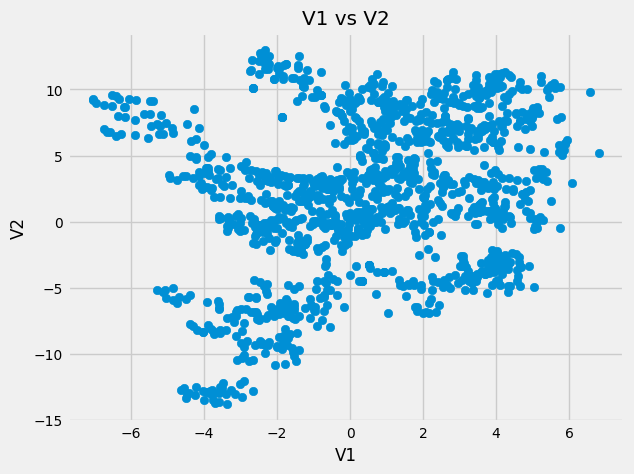

In [3]:
# plot the scatter plot between features v1 and v2
plt.scatter(data_df["V1"], data_df["V2"])
plt.xlabel("V1")
plt.ylabel("V2")
plt.title("V1 vs V2")
plt.show()

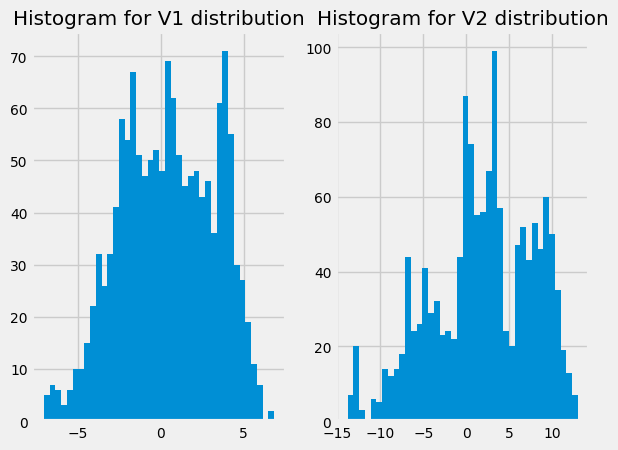

In [4]:
fig, axs = plt.subplots(1, 2, )

# Plot histogram for V1 distribution
axs[0].hist(data_df["V1"], bins=40, histtype='barstacked')
axs[0].set_title("Histogram for V1 distribution")

# Plot histogram for V2 distribution
axs[1].hist(data_df["V2"], bins=40, histtype='barstacked')
axs[1].set_title("Histogram for V2 distribution")

plt.show()

In [5]:
# see info about the features data type
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
dtypes: float64(2)
memory usage: 21.6 KB


In [6]:
data_df.describe().style.background_gradient("coolwarm")

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


In [7]:
# initiate the KMeans algorithms
kmeans = KMeans(n_clusters=5, 
                init="k-means++", 
                n_init=45, 
                random_state=42)

# train the model
kmeans.fit(data_df)
center = kmeans.cluster_centers_

## Plot the data with their cluster circle

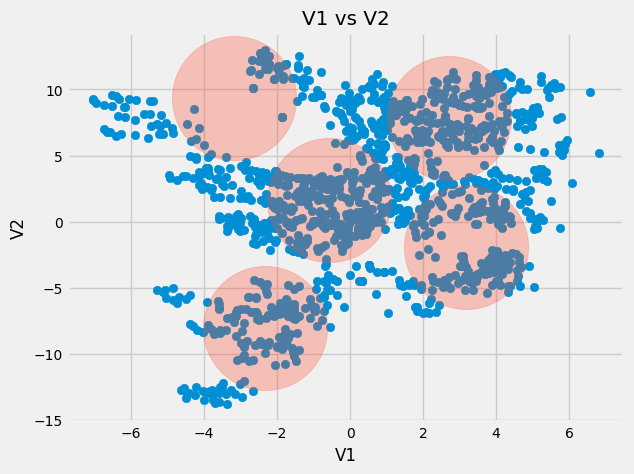

In [8]:
plt.scatter(data_df["V1"], data_df["V2"])
plt.scatter(center[:, 0], center[:, 1], s=8000, alpha=0.3)
plt.xlabel("V1")
plt.ylabel("V2")
plt.title("V1 vs V2")
plt.show()

## Increase the number of cluster and see difference with above

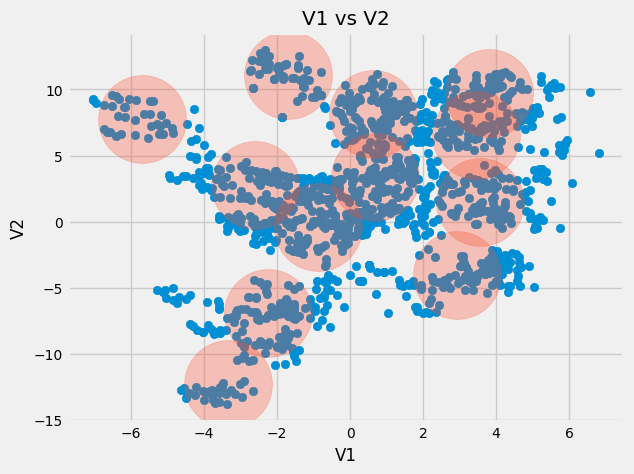

In [9]:
kmeans = KMeans(n_clusters=12, 
                init="k-means++", 
                n_init=45, 
                random_state=42).fit(data_df)
center = kmeans.cluster_centers_

plt.scatter(data_df["V1"], data_df["V2"])
plt.scatter(center[:, 0], center[:, 1], s=4000, alpha=0.3)
plt.xlabel("V1")
plt.ylabel("V2")
plt.title("V1 vs V2")
plt.show()

# Full dataset
**1. Variance of Wavelet Transformed image (continuous):** This refers to the variance of the pixel values in a wavelet transformed image. Variance is a measure of the spread or dispersion of data points. In this context, it represents how much the pixel values vary across the transformed image.

**2. Skewness of Wavelet Transformed image (continuous):** Skewness measures the asymmetry of a probability distribution. In the context of a wavelet transformed image, it represents the degree of distortion or lack of symmetry in the pixel value distribution. Positive skewness indicates a longer tail on the right side, while negative skewness indicates a longer tail on the left side.

**3. Curtosis of Wavelet Transformed image (continuous):** Curtosis, also known as kurtosis, measures the shape of a probability distribution. In the case of a wavelet transformed image, it quantifies the peakedness or flatness of the pixel value distribution. Positive curtosis indicates a relatively peaked distribution, while negative curtosis indicates a relatively flat distribution.

**4. Entropy of image (continuous):** Entropy is a measure of the amount of information or randomness in a dataset. In the context of an image, entropy measures the complexity or unpredictability of the pixel values. Higher entropy values indicate a more complex and diverse range of pixel values, while lower entropy values indicate more predictable and uniform pixel values.

**5. Class (integer):** This represents the class or category of an image. It is an integer value assigned to each image to indicate its label or classification. The class attribute is typically used in supervised machine learning tasks, where the goal is to predict the class of new, unseen images based on their features.

In [10]:
# download the dataset from openml.org
! wget https://www.openml.org/data/download/1586223/php50jXam -O "dataset.csv"

--2024-05-20 14:12:08--  https://www.openml.org/data/download/1586223/php50jXam
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46233 (45K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]  45.15K   170KB/s    in 0.3s    

2024-05-20 14:12:09 (170 KB/s) - ‘dataset.csv’ saved [46233/46233]



In [11]:
# the dataset has multi-column heading 
with open("dataset.csv", encoding="utf-8") as fp:
  content_line = fp.read()

In [12]:
# create list to store the data array
data_array = []
for line in content_line.split("\n"):
  record = line.split(",")
  data_array.append(record)

In [13]:
# see data in data array
data_array[0:35]

[['%%  Source:'],
 ['%%  '],
 ['%%  Owner of database: Volker Lohweg (University of Applied Sciences', ' '],
 ['%%  Ostwestfalen-Lippe', " volker.lohweg '@' hs-owl.de) "],
 ['%%  Donor of database: Helene DÃ¶rksen (University of Applied Sciences',
  ' '],
 ['%%  Ostwestfalen-Lippe', " helene.doerksen '@' hs-owl.de) "],
 ['%%  Date received: August', ' 2012 '],
 ['%%  '],
 ['%%  Data Set Information:'],
 ['%%  '],
 ['%%  Data were extracted from images that were taken from genuine and forged '],
 ['%%  banknote-like specimens. For digitization',
  ' an industrial camera usually '],
 ['%%  used for print inspection was used. The final images have 400x 400 pixels. '],
 ['%%  Due to the object lens and distance to the investigated object gray-scale '],
 ['%%  pictures with a resolution of about 660 dpi were gained. Wavelet Transform '],
 ['%%  tool were used to extract features from images.'],
 ['%%  '],
 ['%%  '],
 ['%%  Attribute Information:'],
 ['%%  '],
 ['%%  1. variance of Wavelet T

In [14]:
features = ["Variance", "Skewness", "Curtosis", "Entropy"]

In [15]:
data_df = pd.read_csv("dataset.csv", skiprows=35,
                      names=["V1", "V2", "V3", "V4", "class"])
data_df.head()

,V1,V2,V3,V4,class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
 2   V3      1372 non-null   float64
 3   V4      1372 non-null   float64
 4   class   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [17]:
# describe the data distribution of features
data_df.describe().style.background_gradient("coolwarm")

,V1,V2,V3,V4,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000


In [18]:
data_df.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,V1,V2,V3,V4,class
V1,1.00,0.26,-0.38,0.28,-0.72
V2,0.26,1.00,-0.79,-0.53,-0.44
V3,-0.38,-0.79,1.00,0.32,0.16
V4,0.28,-0.53,0.32,1.00,-0.02
class,-0.72,-0.44,0.16,-0.02,1.00


### Relation Explanation

From the observation above, it is clear that the features V2 and V3 are highly correlated with a correlation coefficient of -0.79. This indicates that V2 and V3 have an inverse relationship, meaning that as one feature increases, the other feature tends to decrease.

In [19]:
# make class start from 0...n instead of 1...n
data_df["class_new"] = data_df["class"].apply(lambda x: x - 1 if x > 0 else x)
# drop old class column
data_df.drop(columns=["class"])

,V1,V2,V3,V4,class_new
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [20]:
# drop the old class column 
data_df.drop("class", axis=True, inplace=True)
data_df.rename(columns={"class_new": "class"}, inplace=True)
data_df.head()

,V1,V2,V3,V4,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [21]:
# normalize the values in dataset
data_norm_dict = dict()
for i in range(4):
    data_norm_dict[f"norm_{i+1}"] = StandardScaler()
    feature = np.array(data_df[f"V{i+1}"]).reshape(-1, 1)
    data_norm_dict[f"norm_{i+1}"].fit(feature)
    data_df[f"V{i+1}_normalized"] = data_norm_dict[f"norm_{i+1}"].transform(feature).reshape(-1)

In [22]:
feature_column = [f"V{i+1}_normalized" for i in range(4)]
new_column = feature_column + ["class"]
new_column

['V1_normalized', 'V2_normalized', 'V3_normalized', 'V4_normalized', 'class']

In [23]:
# create a new dataframe with normalized feature only
data_norm_df = data_df[new_column]
data_norm_df.head()

,V1_normalized,V2_normalized,V3_normalized,V4_normalized,class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0


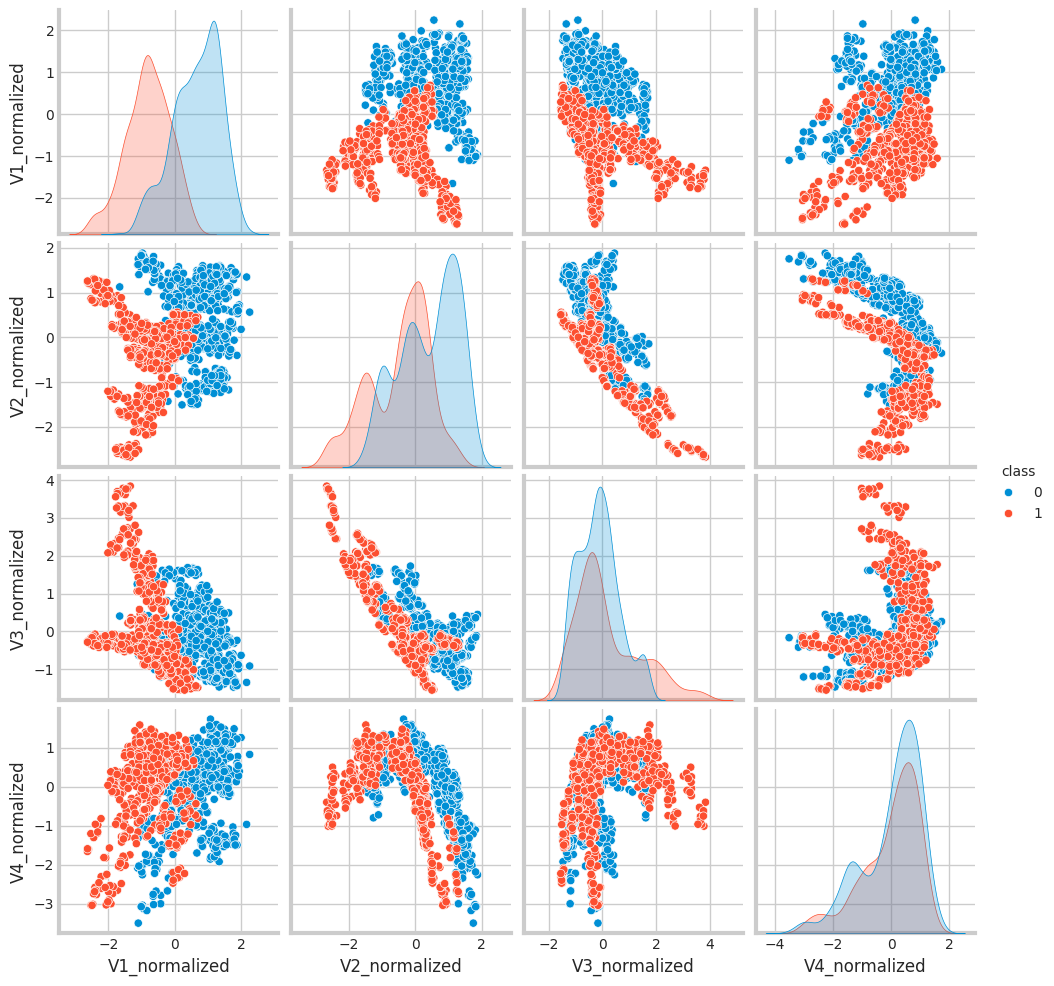

In [24]:
# Set the desired plot style
sns.set_style("whitegrid")
sns.pairplot(data_norm_df, hue = "class");

In [25]:
# count the class in dataset
class_counts = data_df['class'].value_counts()
print(class_counts)

class
0    762
1    610
Name: count, dtype: int64


In [26]:
# plt.style.available

## Visualization of class distributions

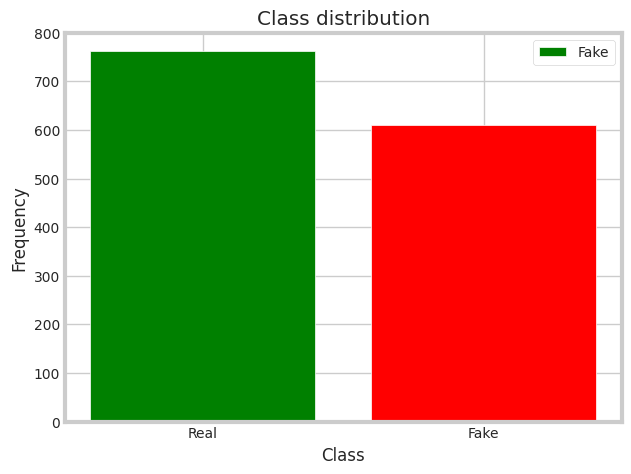

In [27]:
plt.bar(x=[0, 1], height=[class_counts[0], class_counts[1]], color=["Green", "Red"])
plt.style.use("tableau-colorblind10")
plt.ylabel("Frequency")
plt.xlabel("Class")
plt.xticks([0, 1], ["Real", "Fake"])
plt.title("Class distribution")
plt.legend(["Fake", "Real"])
plt.show()

In [28]:
# change the style used for plotting
plt.style.use("classic")

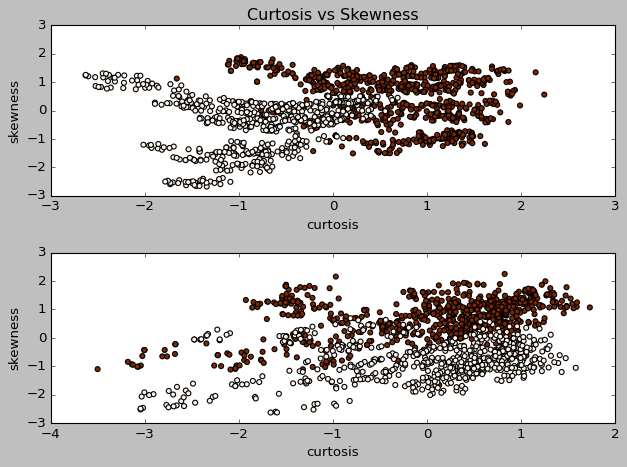

In [29]:
fig, axs = plt.subplots(2, 1)

axs[0].scatter(data_norm_df["V1_normalized"], data_norm_df["V2_normalized"],
               c=data_df["class"], cmap="Oranges_r")
axs[0].set_ylabel("skewness")
axs[0].set_xlabel("curtosis")
axs[0].set_title("Curtosis vs Skewness")

axs[1].scatter(data_norm_df["V4_normalized"], data_norm_df["V1_normalized"],
               c=data_df["class"], cmap="Oranges_r")
axs[1].set_ylabel("skewness")
axs[1].set_xlabel("curtosis")

plt.tight_layout()
plt.show()


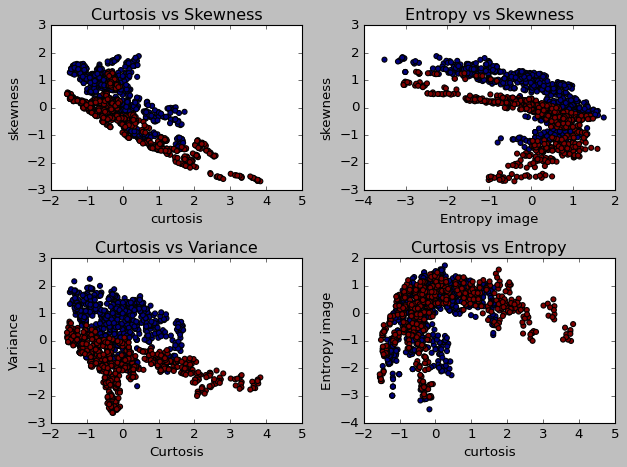

In [30]:
fig, axs = plt.subplots(2, 2)
plt.style.use("seaborn-v0_8-colorblind")

axs[0, 0].scatter(data_norm_df["V3_normalized"], data_norm_df["V2_normalized"], c=data_norm_df["class"])
axs[0, 0].set_ylabel("skewness")
axs[0, 0].set_xlabel("curtosis")
axs[0, 0].set_title("Curtosis vs Skewness")

axs[0, 1].scatter(data_norm_df["V4_normalized"], data_norm_df["V2_normalized"], c=data_norm_df["class"])
axs[0, 1].set_ylabel("skewness")
axs[0, 1].set_xlabel("Entropy image")
axs[0, 1].set_title("Entropy vs Skewness")

axs[1, 0].scatter(data_norm_df["V3_normalized"], data_norm_df["V1_normalized"], c=data_norm_df["class"])
axs[1, 0].set_ylabel("Variance")
axs[1, 0].set_xlabel("Curtosis")
axs[1, 0].set_title("Curtosis vs Variance")

axs[1, 1].scatter(data_norm_df["V3_normalized"], data_norm_df["V4_normalized"], c=data_norm_df["class"])
axs[1, 1].set_ylabel("Entropy image")
axs[1, 1].set_xlabel("curtosis")
axs[1, 1].set_title("Curtosis vs Entropy")

plt.tight_layout()
plt.show()


## Histogram distribution

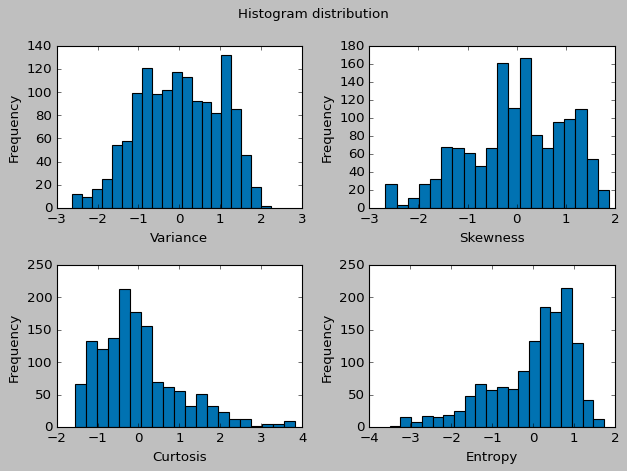

In [31]:
import scipy.stats as stats

fig, ax = plt.subplots(2, 2)
fig.suptitle("Histogram distribution")

for i in range(4):
  ax[i // 2, i % 2].hist(data_norm_df[f"V{i+1}_normalized"], bins=20)
  ax[i // 2, i % 2].set_xlabel(features[i])
  ax[i // 2, i % 2].set_ylabel(f"Frequency")

plt.tight_layout()

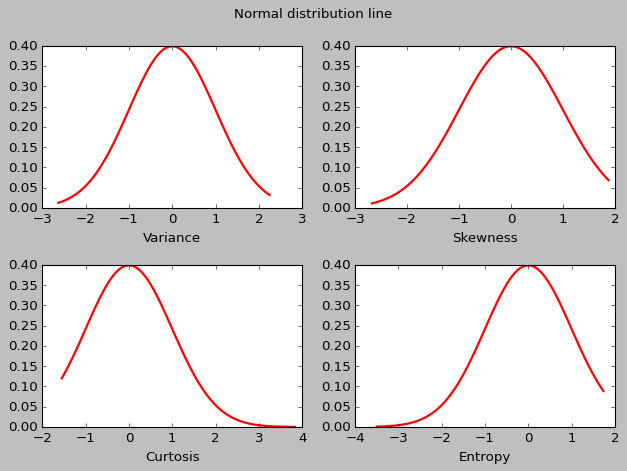

In [32]:
fig, ax = plt.subplots(2, 2)
fig.suptitle("Normal distribution line")
fig.align_xlabels()

for i in range(4):
  mean = data_norm_df[f"V{i+1}_normalized"].mean()
  std = data_norm_df[f"V{i+1}_normalized"].std()
  x = np.linspace(data_norm_df[f"V{i+1}_normalized"].min(), data_norm_df[f"V{i+1}_normalized"].max(), 100)
  y = stats.norm.pdf(x, mean, std)
  ax[i // 2, i % 2].plot(x, y, 'r', linewidth=2)
  ax[i // 2, i % 2].set_xlabel(features[i])
plt.tight_layout()

In [33]:
from sklearn.model_selection import train_test_split

if "class" in data_norm_df.columns:
  y = data_norm_df["class"]
  data_norm_df = data_norm_df.drop("class", axis=1)
  X = data_norm_df

print(f"X shape: {X.shape} and y shape: {y.shape}")


X shape: (1372, 4) and y shape: (1372,)


In [34]:
# split the train and test settings
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=34,
                                                    shuffle=False)
print(f"X_train shape: {X_train.shape} and y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape} and y_test shape: {y_test.shape}")

X_train shape: (1097, 4) and y_train shape: (1097,)
X_test shape: (275, 4) and y_test shape: (275,)


In [35]:
def count_class_freq(kmean_model):
  cluster1 = np.count_nonzero(kmean_model.labels_ == 0)
  cluster2 = np.count_nonzero(kmean_model.labels_)
  return cluster1, cluster2

In [36]:
kmean_model = KMeans(n_clusters=2, init="k-means++", n_init=40, max_iter=500)
kmean_model.fit(X)
print(f"The lowest sse: {kmean_model.inertia_}")
print(f"Cluster center: {kmean_model.cluster_centers_}")

count_class_freq(kmean_model)

The lowest sse: 3453.2841280382154
Cluster center: [[-0.04180316 -0.75040686  0.64143354  0.63438342]
 [ 0.04496528  0.80716986 -0.68995348 -0.68237007]]


(711, 661)

### Silhouette Score
The Silhouette Score is a metric used to evaluate the quality of a clustering result. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1:
- **1**: Indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters.
- **0**: Indicates that the data point is on or very close to the decision boundary between two neighboring clusters.
- **-1**: Indicates that the data point might have been assigned to the wrong cluster.
The Silhouette Score combines cohesion and separation to provide an overall measure of how appropriately the data has been clustered, with higher scores indicating better-defined clusters.

### Adjusted Rand Score
The Adjusted Rand Score (ARS) is a measure of the similarity between two data clusterings. It is used to evaluate the agreement between a predicted clustering and a true clustering (ground truth). The score adjusts the Rand Index to account for chance grouping, with a range from -1 to 1:
- **1**: Perfect agreement between the two clusterings.
- **0**: Agreement between the clusterings is no better than random chance.
- **-1**: Indicates complete disagreement between the clusterings.
The ARS is particularly useful in evaluating clustering algorithms because it provides a normalized score that adjusts for the expected similarity between clusterings due to chance, offering a more robust measure of clustering performance.

In [37]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmean_model.labels_)
print(f"Silhoutee score: {score: .4f}")

ari_kmeans = adjusted_rand_score(y, kmean_model.labels_)
print(f"Adjusted rand score: {ari_kmeans}")

Silhoutee score:  0.3291
Adjusted rand score: 0.013215832778510952


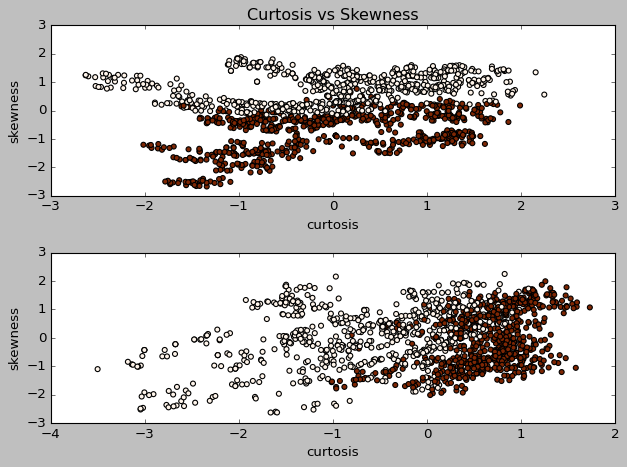

In [38]:
fig, axs = plt.subplots(2, 1)

axs[0].scatter(data_norm_df["V1_normalized"], data_norm_df["V2_normalized"],
               c=kmean_model.labels_, cmap="Oranges_r")
axs[0].set_ylabel("skewness")
axs[0].set_xlabel("curtosis")
axs[0].set_title("Curtosis vs Skewness")

axs[1].scatter(data_norm_df["V4_normalized"], data_norm_df["V1_normalized"],
               c=kmean_model.labels_, cmap="Oranges_r")
axs[1].set_ylabel("skewness")
axs[1].set_xlabel("curtosis")

plt.tight_layout()
plt.show()


In [39]:
y_train.shape, kmean_model.labels_.shape

((1097,), (1372,))

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_cnfusion_matrix(y_true, y_pred):
  confm = confusion_matrix(y_true, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=confm)
  disp.plot()

  plt.show()

>>>> The lowest sse: 405.330770589919
>>>> Cluster center: 
[[ 0.83086442]
 [-0.84799564]]


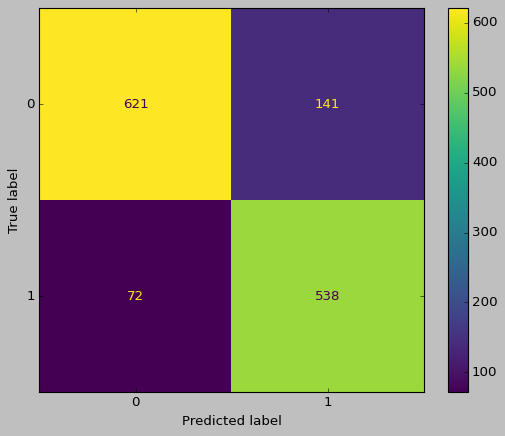

>>>> The lowest sse: 468.8164103230856
>>>> Cluster center: 
[[ 0.72272229]
 [-0.9108444 ]]


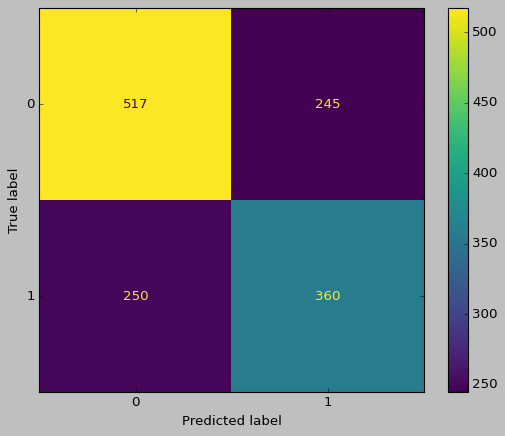

>>>> The lowest sse: 467.1588533860162
>>>> Cluster center: 
[[-0.44972021]
 [ 1.46647893]]


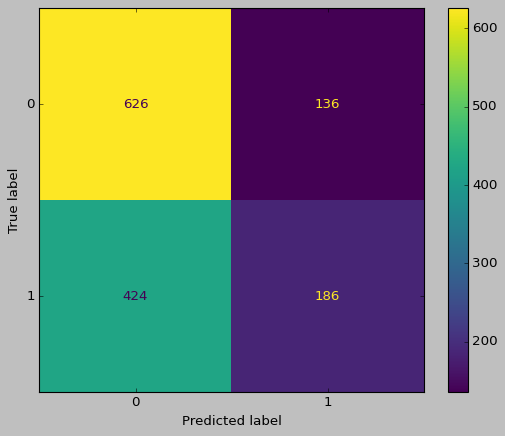

>>>> The lowest sse: 381.5136183847328
>>>> Cluster center: 
[[ 0.52204922]
 [-1.38287506]]


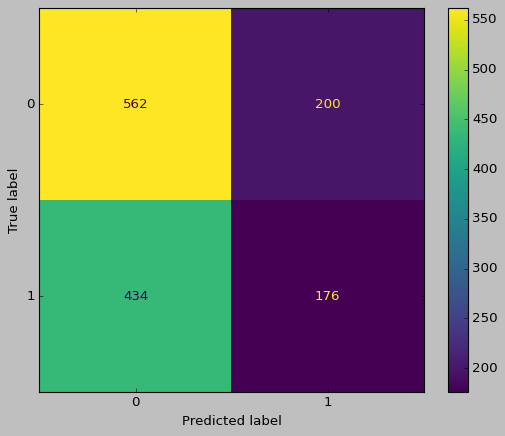

In [41]:
# LKmeans clustering using individual feature
for i in range(4):
  data = np.array(data_norm_df[f"V{i+1}_normalized"]).reshape(-1,1)
  kmeans_model = KMeans(n_clusters=2,
                        init="k-means++", n_init=40,
                        max_iter=500).fit(data)
  print(f">>>> The lowest sse: {kmeans_model.inertia_}")
  print(f">>>> Cluster center: \n{kmeans_model.cluster_centers_}")

  count_class_freq(kmean_model)
  plot_cnfusion_matrix(y, kmeans_model.labels_)